In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Problem Definition

**What are the factors affecting the prices of AirBnbs? How does the significance of these factors vary between cities? How can we illustrate and explain this difference?**

In [6]:
romeData = pd.read_csv("rome_weekdays.csv")
londonData = pd.read_csv("london_weekdays.csv")

**realSum**	             The total price of the Airbnb listing. (Numeric)
**room_type**	        The type of room being offered (e.g. private, shared, etc.). (Categorical)
**room_shared**	        Whether the room is shared or not. (Boolean)
**room_private**	    Whether the room is private or not. (Boolean)
**person_capacity**	    The maximum number of people that can stay in the room. (Numeric)
**host_is_superhost**	 Whether the host is a superhost or not. (Boolean)
**multi**	              Whether the listing is for multiple rooms or not. (Boolean)
**biz**	                 Whether the listing is for business purposes or not. (Boolean)
**cleanliness_rating**	The cleanliness rating of the listing. (Numeric)
**guest_satisfaction_overall**	The overall guest satisfaction rating of the listing. (Numeric)
**bedrooms**	                   The number of bedrooms in the listing. (Numeric)
**dist**	                         The distance from the city centre. (Numeric)
**metro_dist**	                  The distance from the nearest metro station. (Numeric)
**lng	**                        The longitude of the listing. (Numeric)
**lat	**                                 The latitude of the listing. (Numeric)

In [7]:
romeData.describe()

,Index,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000
mean,2245.500000,201.618053,3.351291,0.386687,0.329252,9.516028,93.200134,1.227293,3.044737,0.836155,465.529261,10.316220,1151.153142,25.063845,12.486011,41.895282
std,1296.873034,117.749372,1.314298,0.487045,0.469994,0.809354,7.750982,0.550487,1.638132,0.632382,290.233839,6.431639,624.266723,13.592044,0.028934,0.017977
min,0.000000,46.057092,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.074948,0.011093,84.811611,1.879442,233.019242,5.073485,12.400790,41.818000
25%,1122.750000,136.067145,2.000000,0.000000,0.000000,9.000000,91.000000,1.000000,1.923450,0.335406,242.781940,5.380096,657.775195,14.321618,12.467340,41.884097
50%,2245.500000,179.786314,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.833714,0.639058,402.963542,8.929752,974.873365,21.225738,12.479070,41.897015
75%,3368.250000,235.195100,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,4.042389,1.249921,622.172391,13.787463,1527.877445,33.266193,12.505930,41.907080
max,4491.000000,2418.348023,6.000000,1.000000,1.000000,10.000000,100.000000,4.000000,9.426512,4.147198,4512.595170,100.000000,4592.883342,100.000000,12.582980,41.951780


In [8]:
romeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Index                       4492 non-null   int64  
 1   realSum                     4492 non-null   float64
 2   room_type                   4492 non-null   object 
 3   room_shared                 4492 non-null   bool   
 4   room_private                4492 non-null   bool   
 5   person_capacity             4492 non-null   int64  
 6   host_is_superhost           4492 non-null   bool   
 7   multi                       4492 non-null   int64  
 8   biz                         4492 non-null   int64  
 9   cleanliness_rating          4492 non-null   int64  
 10  guest_satisfaction_overall  4492 non-null   int64  
 11  bedrooms                    4492 non-null   int64  
 12  dist                        4492 non-null   float64
 13  metro_dist                  4492 

In [35]:
romeDataNumeric = pd.DataFrame(romeData[['realSum', 'guest_satisfaction_overall', 'dist', 'metro_dist']])

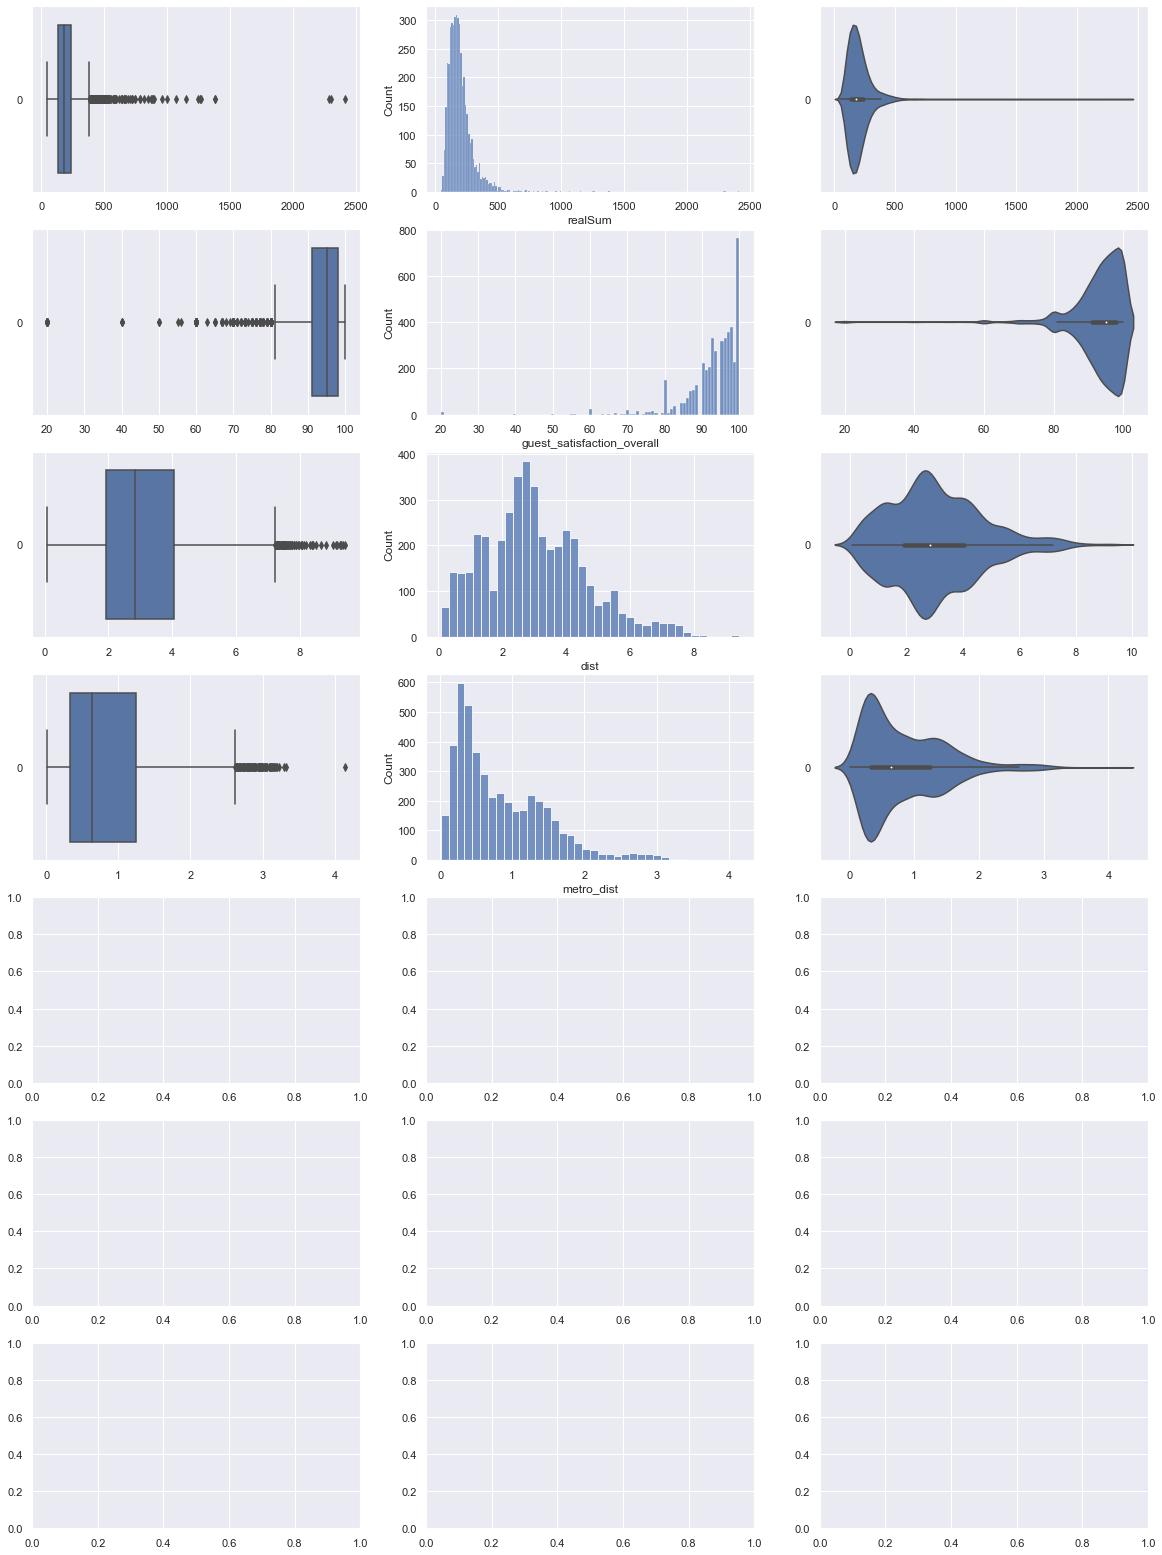

In [36]:
# Draw the distributions of all variables
f, axes = plt.subplots(7, 3, figsize=(20, 28))

count = 0
for var in romeDataNumeric:
    sb.boxplot(data = romeDataNumeric[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = romeDataNumeric[var], ax = axes[count,1])
    sb.violinplot(data = romeDataNumeric[var], orient = "h", ax = axes[count,2])
    count += 1

In [37]:
# Calculate the quartiles
Q1 = romeDataNumeric.quantile(0.25)
Q3 = romeDataNumeric.quantile(0.75)

# Rule to identify outliers
rule = ((romeDataNumeric < (Q1 - 1.5 * (Q3 - Q1))) | (romeDataNumeric > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

realSum                       226
guest_satisfaction_overall    299
dist                           82
metro_dist                     97
dtype: int64

In [38]:
print(romeDataNumeric.corr())

                             realSum  guest_satisfaction_overall      dist  \
realSum                     1.000000                    0.046862 -0.164900   
guest_satisfaction_overall  0.046862                    1.000000  0.075059   
dist                       -0.164900                    0.075059  1.000000   
metro_dist                  0.048681                    0.020278  0.337572   

                            metro_dist  
realSum                       0.048681  
guest_satisfaction_overall    0.020278  
dist                          0.337572  
metro_dist                    1.000000  


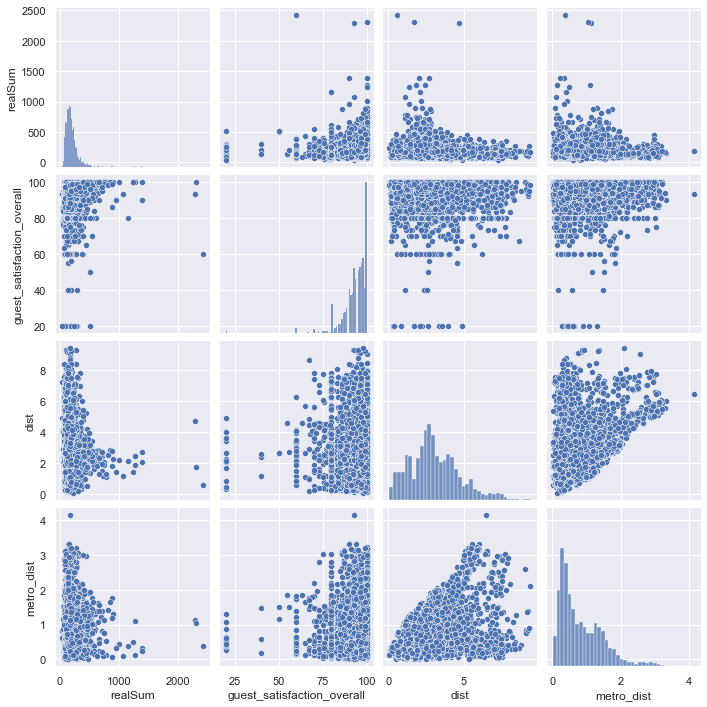

In [39]:
sb.pairplot(romeDataNumeric)

In [40]:
def findOutliers(col):
    Q1 = romeDataNumeric[col].quantile(0.25)
    Q3 = romeDataNumeric[col].quantile(0.75)
    IQR = Q3-Q1
    LowerFence = Q1 - (1.5*IQR)
    UpperFence = Q3 + (1.5*IQR)
    print(LowerFence)
    print(UpperFence)
    
    

In [41]:
def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    
    ls = df.index[(df[col]<lower) | (df[col]>upper)]
    return ls

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [46]:
index_clearing = []
for column in ['guest_satisfaction_overall', 'dist', 'metro_dist']:
    index_clearing.extend(outliers(romeDataNumeric, column))
    
romeDataNumeric_cleaned = pd.DataFrame(remove(romeDataNumeric, index_clearing))

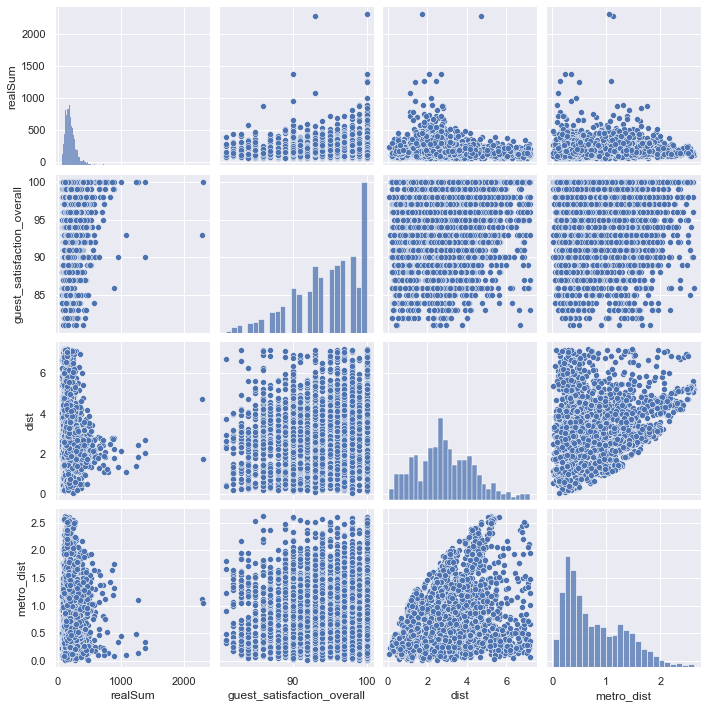

In [47]:
sb.pairplot(romeDataNumeric_cleaned)

In [49]:
print(romeDataNumeric_cleaned.corr())

                             realSum  guest_satisfaction_overall      dist  \
realSum                     1.000000                    0.114273 -0.153301   
guest_satisfaction_overall  0.114273                    1.000000  0.132362   
dist                       -0.153301                    0.132362  1.000000   
metro_dist                  0.087419                   -0.004487  0.270676   

                            metro_dist  
realSum                       0.087419  
guest_satisfaction_overall   -0.004487  
dist                          0.270676  
metro_dist                    1.000000  


**- How do a group of numeric variable affect one variable **
**- One hot vector -> transformig categoric to numeric?**